#📌 Extracão

In [1]:
import pandas as pd
import json
from google.colab import drive

# 1. Montar o Google Drive
drive.mount('/content/drive')

# 2. O caminho para o arquivo no Google Drive
caminho_do_arquivo = "/content/drive/MyDrive/TelecomX_Data.json"

# Carregar JSON
with open(caminho_do_arquivo, "r") as f:
    data = json.load(f)

# Normalizar JSON em DataFrame
df = pd.json_normalize(data)

# Ver primeiras linhas
print("📌 Primeiras linhas do dataset:")
display(df.head())

# Info do dataset
print("\n📌 Informações gerais:")
print(df.info())


Mounted at /content/drive
📌 Primeiras linhas do dataset:


,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4



📌 Informações gerais:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport     

#🔧 Transformação

In [6]:
# Padronizar coluna churn (1 = saiu, 0 = ficou)
df["Churn"] = pd.to_numeric(df["Churn"].replace({"Yes":1, "No":0}), errors="coerce")

# Converter valores numéricos
df["account.Charges.Total"] = pd.to_numeric(df["account.Charges.Total"], errors="coerce")

# Criar coluna de contas diárias
df["Contas_Diarias"] = df["account.Charges.Monthly"] / 30

# Tratar valores nulos (para as colunas 'account.Charges.Total' e 'Churn')
df.fillna(0, inplace=True)

# Conferir resultado
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
0,0002-ORFBO,0.0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0003-MKNFE,0.0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,0004-TLHLJ,1.0,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,0011-IGKFF,1.0,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,0013-EXCHZ,1.0,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


#📊 Carga e análise

 Estatísticas Descritivas:


,account.Charges.Monthly,account.Charges.Total,Contas_Diarias
count,7267.000000,7267.000000,7267.000000
mean,64.720098,2277.182035,2.157337
std,30.129572,2268.648587,1.004319
min,18.250000,0.000000,0.608333
25%,35.425000,396.200000,1.180833
50%,70.300000,1389.200000,2.343333
75%,89.875000,3778.525000,2.995833
max,118.750000,8684.800000,3.958333


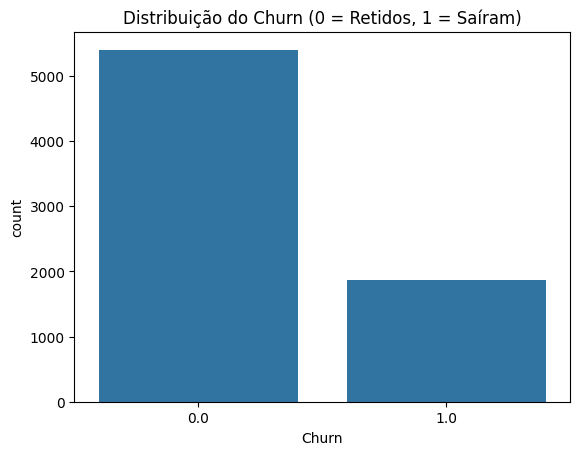

📌 Taxa de churn: 25.72 %


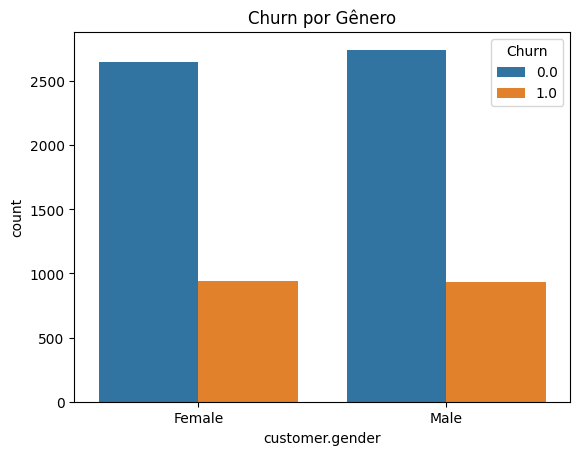

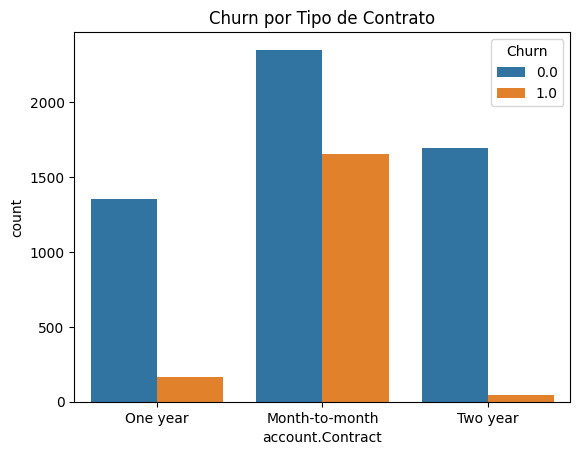

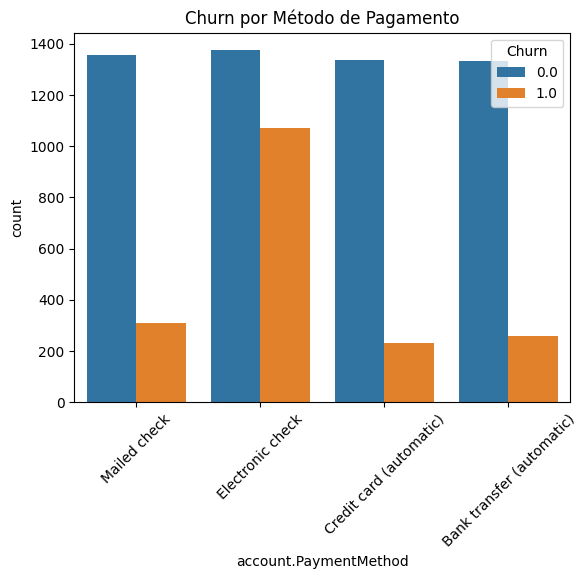

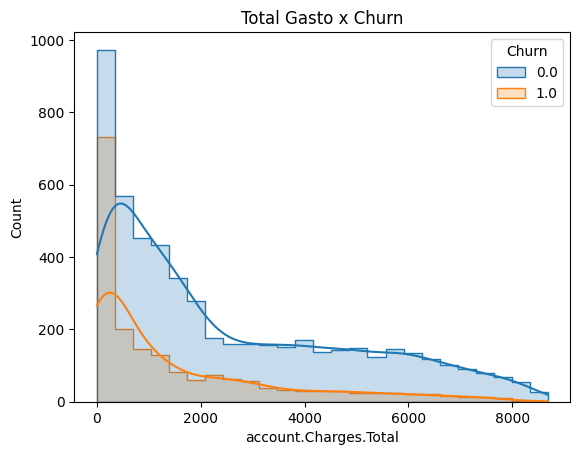

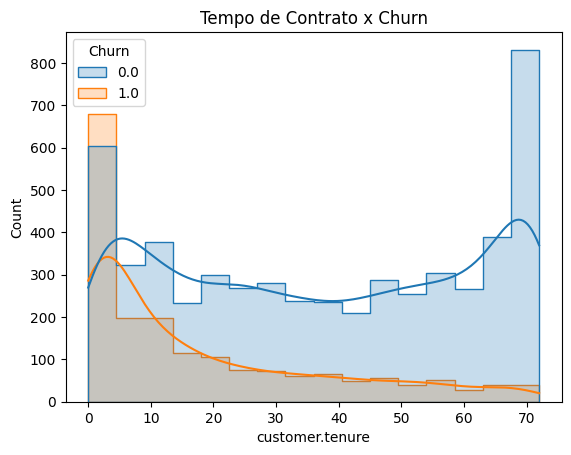

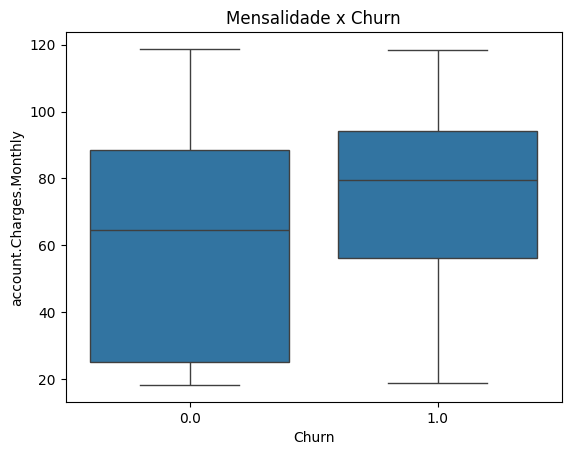

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Estatísticas descritivas ---
print(" Estatísticas Descritivas:")
display(df[["account.Charges.Monthly","account.Charges.Total","Contas_Diarias"]].describe())

# --- Distribuição do Churn ---
sns.countplot(x="Churn", data=df)
plt.title("Distribuição do Churn (0 = Retidos, 1 = Saíram)")
plt.show()

print(f"📌 Taxa de churn: {round(df['Churn'].mean()*100,2)} %")

# --- Churn por variáveis categóricas ---
sns.countplot(x="customer.gender", hue="Churn", data=df)
plt.title("Churn por Gênero")
plt.show()

sns.countplot(x="account.Contract", hue="Churn", data=df)
plt.title("Churn por Tipo de Contrato")
plt.show()

sns.countplot(x="account.PaymentMethod", hue="Churn", data=df)
plt.title("Churn por Método de Pagamento")
plt.xticks(rotation=45)
plt.show()

# --- Churn por variáveis numéricas ---
sns.histplot(data=df, x="account.Charges.Total", hue="Churn", kde=True, element="step")
plt.title("Total Gasto x Churn")
plt.show()

sns.histplot(data=df, x="customer.tenure", hue="Churn", kde=True, element="step")
plt.title("Tempo de Contrato x Churn")
plt.show()

sns.boxplot(x="Churn", y="account.Charges.Monthly", data=df)
plt.title("Mensalidade x Churn")
plt.show()


#📄Relatorio Final
## Introdução
O objetivo desta análise foi entender os fatores que influenciam a evasão de clientes (churn) da TelecomX, utilizando um processo de ETL (Extração, Transformação e Carga) e uma Análise Exploratória de Dados (EDA).
## Principais Achados
- A taxa de churn é de 25.72%, indicando que mais de um quarto da base de clientes cancelou o serviço.

- Clientes com contrato mensal têm uma taxa de churn significativamente mais alta em comparação com aqueles com contratos de um ou dois anos.

- Os métodos de pagamento cheque eletrônico e cheque pelo correio estão mais associados à evasão do que os métodos de pagamento automático.

- Clientes com pouco tempo de contrato (tenure baixo) cancelam com maior frequência. A taxa de churn diminui drasticamente conforme o tempo de permanência aumenta.

Há uma relação entre mensalidades altas e maior taxa de churn, conforme observado no gráfico de boxplot.

## Sugestões Estratégicas
- Contratos e Fidelização: Criar incentivos e bônus para a migração de clientes de contratos mensais para contratos anuais ou bianuais.

- Métodos de Pagamento: Oferecer descontos ou benefícios para clientes que optem por métodos de pagamento automáticos, como cartão de crédito e débito em conta.

- Monitoramento de Risco: Desenvolver um sistema para monitorar e oferecer suporte proativo a clientes de maior risco, como aqueles com pouca permanência e que usam contratos mensais.

- Revisão de Preços: Analisar a política de preços para clientes com mensalidades altas, buscando estratégias de retenção específicas para esse grupo.
## Conclusão
Com essas ações baseadas nos insights da análise, e com a construção de modelos preditivos futuros, a empresa poderá direcionar seus esforços para reduzir a taxa de churn e aumentar a retenção de clientes de forma eficaz.